In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 , l1

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('yourdata.csv')
df.shape

(19904, 133)

In [5]:
df.isna().sum().sum()

39521

In [7]:
# Split data into features and target
X = df.drop("target", axis=1)
y = df["target"]

In [8]:
# Separate categorical and numerical variables
categorical_vars = X.select_dtypes(include='object')
numerical_vars = X.select_dtypes(exclude='object')

In [9]:
#Normalization of data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numb_df = pd.DataFrame(scaler.fit_transform(numerical_vars), columns = numerical_vars.columns)

In [10]:
# define the imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 7)

In [11]:
new_numb_df = pd.DataFrame(imputer.fit_transform(numb_df),columns = numb_df.columns)

In [12]:
# Handle missing values for categorical variables

imputer = SimpleImputer(strategy='most_frequent')
categorical_vars = pd.DataFrame(imputer.fit_transform(categorical_vars), columns=categorical_vars.columns)

In [13]:
# Encode categorical variables

label_encoder = LabelEncoder()
for col in categorical_vars.columns:
    categorical_vars[col] = label_encoder.fit_transform(categorical_vars[col])

In [14]:
# Concatenate the categorical and numerical variables back together
df = pd.concat([categorical_vars, new_numb_df], axis=1)

In [15]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [16]:
# Build the neural network
#32/4/1


model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.2))
kernel_regularizer=l1(0.01)
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2023-01-24 20:43:36.852247: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-24 20:43:36.852270: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: node0029.palmetto.clemson.edu
2023-01-24 20:43:36.852275: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: node0029.palmetto.clemson.edu
2023-01-24 20:43:36.852383: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.48.7
2023-01-24 20:43:36.852399: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.48.7
2023-01-24 20:43:36.852403: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.48.7
2023-01-24 20:43:36.852716: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)

In [17]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [19]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
498/498 [==============================] - 1s 1ms/step - loss: 0.3635 - accuracy: 0.8834 - val_loss: 0.3214 - val_accuracy: 0.8857
Epoch 2/100
498/498 [==============================] - 1s 1ms/step - loss: 0.3275 - accuracy: 0.8891 - val_loss: 0.3081 - val_accuracy: 0.8857
Epoch 3/100
498/498 [==============================] - 1s 1ms/step - loss: 0.3171 - accuracy: 0.8891 - val_loss: 0.3032 - val_accuracy: 0.8857
Epoch 4/100
498/498 [==============================] - 1s 1ms/step - loss: 0.3149 - accuracy: 0.8892 - val_loss: 0.3059 - val_accuracy: 0.8857
Epoch 5/100
498/498 [==============================] - 1s 1ms/step - loss: 0.3118 - accuracy: 0.8891 - val_loss: 0.3037 - val_accuracy: 0.8860
Epoch 6/100
498/498 [==============================] - 1s 1ms/step - loss: 0.3100 - accuracy: 0.8895 - val_loss: 0.3051 - val_accuracy: 0.8865
Epoch 7/100
498/498 [==============================] - 1s 1ms/step - loss: 0.3077 - accuracy: 0.8888 - val_loss: 0.3013 - val_accuracy: 0.8860

In [20]:
# Evaluate the model

scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

125/125 [==============================] - 0s 661us/step - loss: 0.3076 - accuracy: 0.8857
Accuracy: 88.57%


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Predict the probabilities of the test set
y_pred_proba = model.predict(X_test)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: {:.2f}".format(auc))

125/125 [==============================] - 0s 624us/step
AUC: 0.75


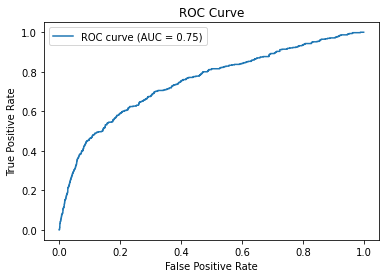

In [22]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [35]:
X_train.shape

(15923, 128)

In [23]:
# Sequential Backward Selection (SBS) 

from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [52]:
# Create an instance of the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)

# Create an instance of SBS
sbs = SFS(knn, 
           k_features=100, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

In [53]:
# Fit the SBS model to the data
sbs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:  1.6min finished

[2023-01-25 00:01:37] Features: 127/100 -- score: 0.8853860945228498[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 127 out of 127 | elapsed:  2.3min finished

[2023-01-25 00:03:56] Features: 126/100 -- score: 0.8857629000575878[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:  2.3min finished

[2023-01-25 00:06:12] Features: 125/100 -- score: 0.8860769309656604[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)

SequentialFeatureSelector(estimator=KNeighborsClassifier(), forward=False,
                          k_features=(100, 100), scoring='accuracy', verbose=2)

In [54]:
# Print the selected features
print(sbs.k_feature_idx_)

(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62, 63, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 77, 81, 82, 83, 85, 86, 89, 93, 95, 97, 98, 99, 100, 101, 102, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 124, 126)


In [55]:
# Select the top 10 features
X_train_sbs = X_train.values[:, sbs.k_feature_idx_]
X_test_sbs = X_test.values[:, sbs.k_feature_idx_]

In [104]:
# Build the neural network
#128/4/1


model = Sequential()
model.add(Dense(512, input_dim=X_train_sbs.shape[1], activation='relu'))
model.add(Dropout(0.5))
kernel_regularizer=l2(0.01)
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [105]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
# Define early stopping and reduce learning rate on plateau callbacks
from keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

In [111]:
# Train the model
batch_size = 16
epochs = 50
history = model.fit(X_train_sbs, y_train, batch_size=batch_size, epochs=epochs, 
                    validation_data=(X_test_sbs, y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/50
996/996 [==============================] - 2s 2ms/step - loss: 0.2942 - accuracy: 0.8891 - val_loss: 0.3019 - val_accuracy: 0.8857 - lr: 4.0000e-05
Epoch 2/50
996/996 [==============================] - 2s 2ms/step - loss: 0.2943 - accuracy: 0.8891 - val_loss: 0.3019 - val_accuracy: 0.8857 - lr: 4.0000e-05
Epoch 3/50
996/996 [==============================] - 2s 2ms/step - loss: 0.2936 - accuracy: 0.8890 - val_loss: 0.3019 - val_accuracy: 0.8857 - lr: 4.0000e-05
Epoch 4/50
996/996 [==============================] - 2s 2ms/step - loss: 0.2941 - accuracy: 0.8891 - val_loss: 0.3020 - val_accuracy: 0.8857 - lr: 4.0000e-05
Epoch 5/50
996/996 [==============================] - 2s 2ms/step - loss: 0.2920 - accuracy: 0.8891 - val_loss: 0.3020 - val_accuracy: 0.8857 - lr: 8.0000e-06
Epoch 6/50
996/996 [==============================] - 2s 2ms/step - loss: 0.2932 - accuracy: 0.8891 - val_loss: 0.3020 - val_accuracy: 0.8857 - lr: 8.0000e-06


In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Predict the probabilities of the test set
y_pred_proba = model.predict(X_test_sbs)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: {:.2f}".format(auc))

125/125 [==============================] - 0s 598us/step
AUC: 0.76


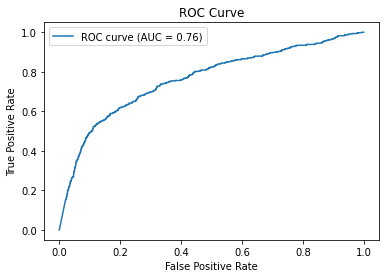

In [113]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()